Accuracy on synthetic dataset: 100.00%
Classification report:
               precision    recall  f1-score   support

         Cat       1.00      1.00      1.00        20
         Dog       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



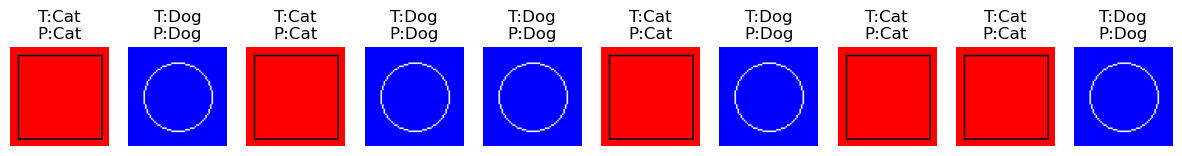

In [2]:
import numpy as np
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic dataset: simple colored squares to represent cats and dogs
def create_synthetic_images(n_per_class=50, size=(64, 64)):
    images = []
    labels = []

    for _ in range(n_per_class):
        # Create "cat" images - red squares with some distortion
        img_cat = Image.new('RGB', size, color='red')
        draw = ImageDraw.Draw(img_cat)
        draw.rectangle([5, 5, size[0]-5, size[1]-5], outline='black')
        imgs_cat = np.array(img_cat).flatten()
        images.append(imgs_cat)
        labels.append(0)  # label for cat

        # Create "dog" images - blue squares with different pattern
        img_dog = Image.new('RGB', size, color='blue')
        draw = ImageDraw.Draw(img_dog)
        draw.ellipse([10, 10, size[0]-10, size[1]-10], outline='white')
        imgs_dog = np.array(img_dog).flatten()
        images.append(imgs_dog)
        labels.append(1)  # label for dog

    return np.array(images), np.array(labels)

# Generate dataset
X, y = create_synthetic_images(n_per_class=100)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict
y_pred = svm.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on synthetic dataset: {accuracy * 100:.2f}%")
print("Classification report:\n", classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# Visualize some predictions
def show_samples(samples, labels_true, labels_pred, n=10):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(len(samples), n, replace=False)
    for i, idx in enumerate(indices):
        img = samples[idx].reshape(64, 64, 3).astype(np.uint8)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"T:{'Cat' if labels_true[idx]==0 else 'Dog'}\nP:{'Cat' if labels_pred[idx]==0 else 'Dog'}")
        plt.axis('off')
    plt.show()

show_samples(X_test, y_test, y_pred, n=10)